# Introduction on Using the language R to access GeoNet's GNSS data

In this notebook we will learn how to get data from one GNSS station. By the end of this notebook you should be able to make a graph like the one below. <img src="plot.png">

## &nbsp; Table of contents

### 1. Introduction
### 2. Building the base FITS query
### 3. Get GNSS data
### 4. Plot data 
### 5. Save data

## &nbsp; 1. Introduction

In this tutorial we will be learning how to use R to access GNSS (commonly referred to at GPS) data from the continuous GNSS sites in the GeoNet and PositioNZ networks.
GeoNet has a API (Application Programming Interface) to access its GNSS data. You do not need to know anything about APIs to use this tutorial but if you would like more info see https://fits.geonet.org.nz/api-docs/. 

R is a language made for statisticians by statisticians. It is an open source language which anyone can make a package for. This means that R has a lot of useful functions for all kinds of research.

This tutorial assumes that you have basic knowledge of the language R, but basic knowledge of any programming language should be sufficient to follow this tutorial.

All data will be saved into R as a data frame which is much like, what would be called, a dictionary in other languages, but with a few more restrictions to the data structure. To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame

###### About Geonet GNSS data

GeoNet uses GNSS technology to work out the precise positions of over 190 stations in and around NZ everyday.
These positions are used to generate a displacement timeseries for each station so we can observe how much and how quickly each station moves. <br>
This data has 3 components:
<ul>
    <li> The displacement in the east west dirction where east is a positive displacement. This has a typeID of "e"
    <li> The displacement in the north south dirction where north is a positive displacement. This has a typeID of "n"
    <li> The displacement in the up down dirction where up is a positive displacement. This has a typeID of "u"</ul>
For more on data types go to http://fits.geonet.org.nz/type (for best formatting use firefox)   

## &nbsp; 2. Building the base FITS query

###### Call libraries  

In [1]:
library(httr)

The library httr (https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html) is a base package of R and will not need to be imported.

###### Set URL

In [2]:
base_url <- "http://fits.geonet.org.nz/"
endpoint <- "observation"

The base URL should be set as above, and the endpoint is set to observation to get the observation data. There are other endpoints which will return different information such as plot and site. To learn more go to https://fits.geonet.org.nz/api-docs/.

###### Set parameters

In [3]:
type <- "e"
site <- "HANM"

Set the parameters to get the east component `type <- "e"` of the site in the Hanmer Basin with the siteID HANM `site <- "HANM"`. To Find these 4 letter site IDs you can use https://www.geonet.org.nz/data/network/sensor/search and search for GNSS antenna. 

###### Combine information to get full URL

In [4]:
full_url <- paste(base_url,endpoint,"?typeID=",type,"&siteID=",site, sep="")

Combine the information to make the full URL. `sep=""` make sure there is no space between each piece of information. In this case you get the URL http://fits.geonet.org.nz/observation?typeID=e&siteID=HANM

## &nbsp; 3. Get GNSS data

###### Get East data

In [5]:
east <- GET(full_url)

Get the data at the above URL we have made.

###### Get North data

In [6]:
type <- "n"
full_url <- paste(base_url,endpoint,"?typeID=",type,"&siteID=",site, sep="")
north <- GET(full_url)

Change the type to "n" using `type <- "n"`, then use the same code as before to make the full URL, and then use `GET` to get the data at the URL

###### Get Up data

In [7]:
type <- "u"
full_url <- paste(base_url,endpoint,"?typeID=",type,"&siteID=",site, sep="")
up <- GET(full_url)

Change the type to "u" using `type <- "u"`, then use the same code as before to make the full URL, and then use `GET` to get the data at the URL

###### Check that your requests for data worked 

In [8]:
paste("The Response status code of the east channle is", east$status_code)
paste("The Response status code of the north channle is", north$status_code)
paste("The Response status code of the up channle is", up$status_code)

[1] "The Response status code of the east channle is 200"

[1] "The Response status code of the north channle is 200"

[1] "The Response status code of the up channle is 200"

The response status code says whether we were successful in getting the data requested and why not if we were unsuccessful:
<ul>
<li>200 -- everything went okay, and the result has been returned (if any)
<li>301 -- the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
<li>400 -- the server thinks you made a bad request. This can happen when you don't send along the right data, among other things.
<li>404 -- the resource you tried to access wasn't found on the server.
</ul>

###### Get content from the east request. 

In [9]:
df_e <- content(east, encoding ="UTF-8")

Parsed with column specification:
cols(
  `date-time` = col_datetime(format = ""),
  `e (mm)` = col_double(),
  `error (mm)` = col_double()
)


This takes the content of the east request, which is encoded in UTF-8 before we unpack it, and unpacks it into a data frame. The text in the red box says that R has identified the data to have 3 columns which it has named `date-time` `e (mm)` and `error (mm)`. It has also identified the data type in each column and converted them from the UTF-8 encoding into its identified data type. The first column has been identified to have datetime data in it. The other columns have been identified as having the data type double. A double is a real number between $ 2*10^{-308}$  and $ 2*10^{308}$ . 

###### Print the first few lines of the east data frame

In [10]:
head(df_e)

date-time,e (mm),error (mm)
2014-06-04 11:59:00,-305.94,2.02
2014-06-05 11:59:00,-301.13,1.66
2014-06-06 11:59:00,-296.94,1.87
2014-06-07 11:59:00,-300.43,1.82
2014-06-08 11:59:00,-301.36,1.65
2014-06-09 11:59:00,-301.55,1.20


Here we can see on the 4th of June 2014 the site HANM had moved 300.73 mm west &plusmn; 2.02 mm from its initial position.

###### Get content from the north and up requests. 

In [11]:
df_n <- content(north, encoding ="UTF-8")
df_u <- content(up, encoding ="UTF-8")

Parsed with column specification:
cols(
  `date-time` = col_datetime(format = ""),
  `n (mm)` = col_double(),
  `error (mm)` = col_double()
)
Parsed with column specification:
cols(
  `date-time` = col_datetime(format = ""),
  `u (mm)` = col_double(),
  `error (mm)` = col_double()
)


Done the same for the east request.

## &nbsp; 4. Plot

###### Plot "east west" GNSS data for the site HANM

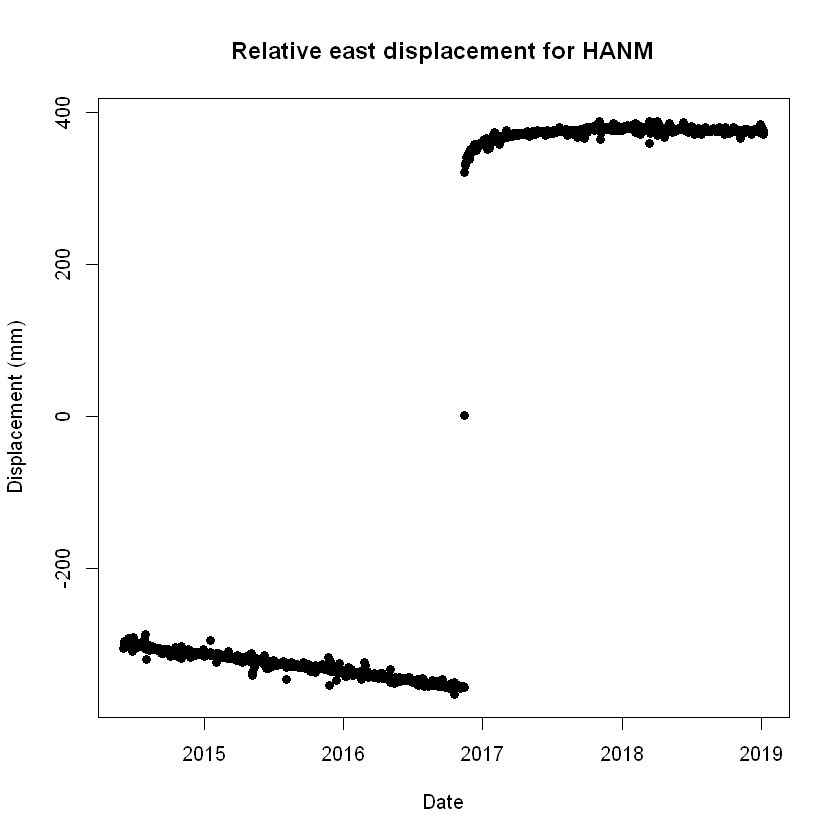

In [12]:
plot(df_e$'date-time', df_e$'e (mm)',main= "Relative east displacement for HANM", xlab = "Date", ylab = "Displacement (mm)", pch = 16)

The data `df_e$'date-time'` is the data time data in the east data frame. This is set to be on the x axis. ` df_e$'e (mm)'` is the displacement data from the east data frame. This is set to be on the y axis. ` main= "Relative east displacement for HANM"` gives the graph its title. ` xlab = "Date", ylab = "Displacement (mm)"` give the graph its x and y axis titles. `pch  = 16` says that each data point will be put on the graph as a circle filled in point. To save this plot right click on it in this notebook

###### Plot north and up GNSS data for the site HANM

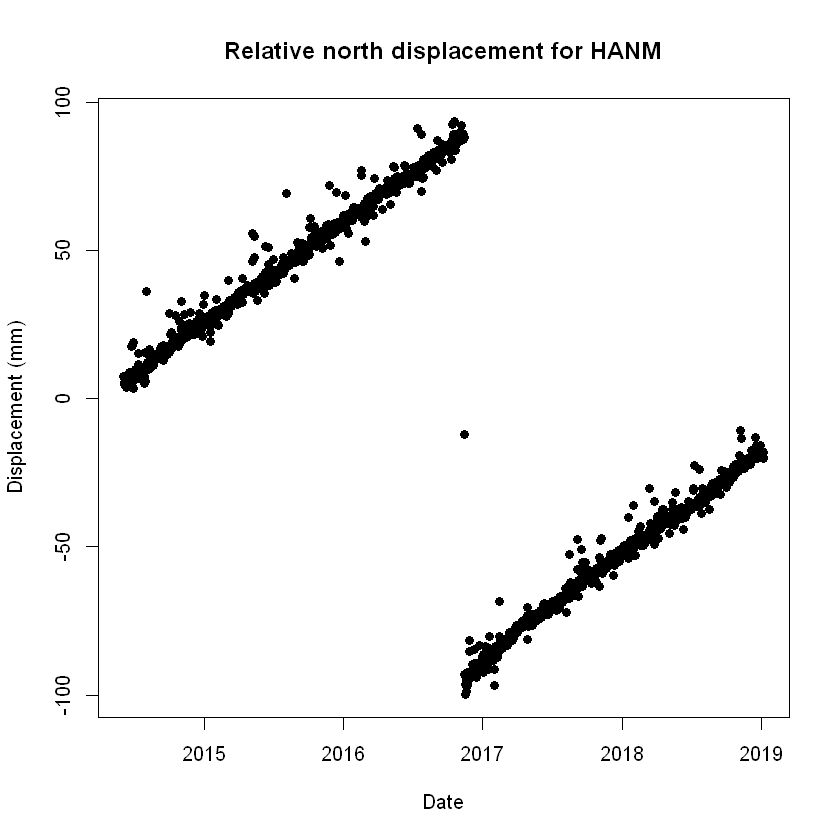

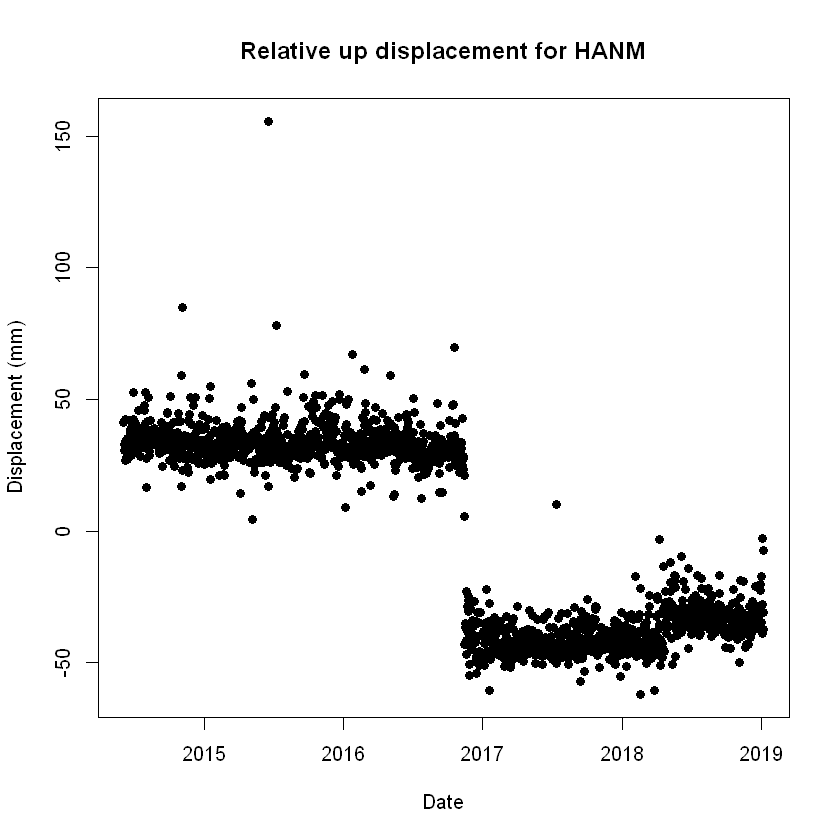

In [13]:
plot(df_n$'date-time', df_n$'n (mm)',main= "Relative north displacement for HANM", xlab = "Date", ylab = "Displacement (mm)", pch = 16)
plot(df_u$'date-time', df_u$'u (mm)',main= "Relative up displacement for HANM", xlab = "Date", ylab = "Displacement (mm)", pch = 16)

Done the same as for east data

## &nbsp; 5. Save

###### Make a new data frame with only that data we wish to save

In [14]:
new_df <- data.frame(
    df_e$'date-time', 
    df_e$'e (mm)', 
    df_n$'n (mm)',
    df_u$'u (mm)'
)
colnames(new_df) = c("date-time", "e (mm)", 'n (mm)','u (mm)')

Make a new data frame with 4 columns holding the date-time data, east displacement data, north displacement data and up displacement data. Then rename the columns using ` colnames(new_df)`

###### Print the first few lines of this data frame

In [15]:
head(new_df)

date-time,e (mm),n (mm),u (mm)
2014-06-04 11:59:00,-305.94,7.64,41.20
2014-06-05 11:59:00,-301.13,5.40,32.74
2014-06-06 11:59:00,-296.94,4.96,30.70
2014-06-07 11:59:00,-300.43,6.59,42.30
2014-06-08 11:59:00,-301.36,5.80,26.76
2014-06-09 11:59:00,-301.55,6.93,34.16


Here we can see on the 4th of June 2014 the site HANM had moved 300.73 mm, west 7.44 mm north and 40.82 mm up from its initial position.

###### Save this data frame as a CSV

In [16]:
write.csv(new_df, "HANM.csv")

This saves `new_df` as a csv file with the name HANM. This file will be saved in the same folder as this code is run from. 

## Useful links

<ul>
    <li>This notebook uses the language R https://www.r-project.org/
    <li>This notebook uses the library httr https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html
    <li>To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame
    <li>There is a notebook on this data set in Python at (link to put in)
    <li>More tutorials on GNSS data can be found at (link to right place in github) 
    <li>To learn more about station codes go to https://www.geonet.org.nz/data/supplementary/channels
    <li>For more on data types in FITS go to http://fits.geonet.org.nz/type (for best formatting use firefox)
    <li>For more on FITS go to https://fits.geonet.org.nz/api-docs/    
</ul>        